In [95]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats
import pickle
from sklearn.metrics import silhouette_score


#df = pd.read_pickle('../data/relationship_features_forclustering.pandas_df')
df = pickle.load(open('../data/relationship_features_forclustering.pandas_df', "rb"))
df.head()


,message_count,message_count_user,message_count_contact,word_count,word_count_user,word_count_contact,I_count,I_count_user,I_count_contact,You_count,...,response_time_contact,sentiment_reciprocity,message_count_reciprocity,word_count_reciprocity,I_count_reciprocity,You_count_reciprocity,We_count_reciprocity,Us_count_reciprocity,Pet_count_reciprocity,response_time_reciprocity
2010-10-31,0.031830,0.019830,0.208333,0.072584,0.053963,0.151083,0.082051,0.044586,0.236842,0.087209,...,0.0,0.076663,0.714286,0.664160,0.777778,0.250000,0.0,0.0,0.0,1.0
2010-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
2010-12-31,0.007958,0.005666,0.041667,0.025251,0.018123,0.055302,0.020513,0.012739,0.052632,0.046512,...,0.0,0.127850,0.500000,0.723881,1.000000,0.333333,0.0,0.0,0.0,1.0
2011-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN
2011-02-28,0.021220,0.016997,0.083333,0.121557,0.139843,0.044470,0.046154,0.044586,0.052632,0.058140,...,0.0,0.128800,0.333333,0.075435,0.285714,0.000000,0.0,0.0,0.0,1.0


In [96]:
df.drop(['Pet_count_reciprocity' ,'Pet_count', 'Pet_count_user', 'Pet_count_contact'], axis=1, inplace=True)

In [97]:
df.shape

(5317, 41)

In [98]:
df.dropna(inplace = True)

In [99]:
df.shape

(1276, 41)

In [58]:
for n in range(2,11):
    for k in range(2,4):
        pca = RandomizedPCA(n_components=n, whiten=True).fit(df) # pca is an instance of class randomizedPCA with data['data']

        X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.

        pred = []
        k_means = KMeans(n_clusters = k, init='k-means++')
        pred = k_means.fit_predict(X)
        print n, k, silhouette_score(X, pred, metric='euclidean')

#print(stats.describe(X))
#print X.shape
#print(pca.explained_variance_ratio_)


2 2 0.347294847371
2 3 0.376609628283
3 2 0.281249109016
3 3 0.301879568936
4 2 0.216110807701
4 3 0.231745719802
5 2 0.204827462774
5 3 0.211453716358
6 2 0.176818993242
6 3 0.187989173125
7 2 0.146222254764
7 3 0.158272308149
8 2 0.262268789055
8 3 0.1336182798
9 2 0.188318718219
9 3 0.119552607828
10 2 0.0998747447164
10 3 0.102993518106


In [104]:
pca = RandomizedPCA(n_components=10, whiten=True).fit(df) # pca is an instance of class randomizedPCA with data['data']

X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.


In [103]:

pred = []
k_means = KMeans(n_clusters = 2, init='k-means++')
pred = k_means.fit_predict(X)
print n, k, silhouette_score(X, pred, metric='euclidean')



10 3 0.163683670523


IndexError: index 2 is out of bounds for axis 0 with size 2

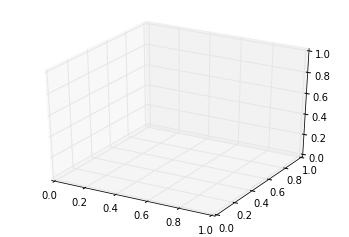

In [92]:
# 3d plot for 3 %pylab inline
from mpl_toolkits.mplot3d import Axes3D
colors = ["b", "r", "k", "m", "g"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii, pp in enumerate(X):
    ax.scatter(X[ii][0], X[ii][1], X[ii][2], color = colors[pred[ii]])


ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()

Populating the interactive namespace from numpy and matplotlib


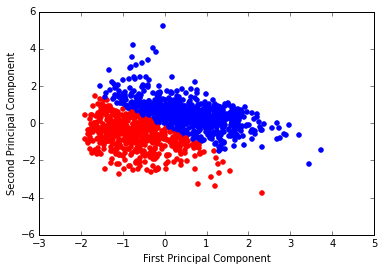

In [101]:
# 2D plot for 2 PCs
%pylab inline

colors = ["b", "r", "k", "m", "g"]

for ii, pp in enumerate(X):
    plt.scatter(X[ii][0], X[ii][1], color = colors[pred[ii]])


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

Populating the interactive namespace from numpy and matplotlib


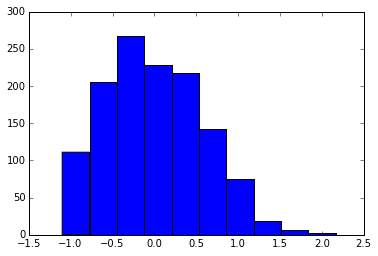

In [17]:
%pylab inline
plt.hist(X[:,0])

#plt.scatter(X[:,0], X[:,1])
plt.show()

Populating the interactive namespace from numpy and matplotlib


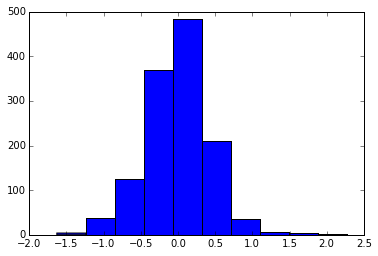

In [18]:
%pylab inline
plt.hist(X[:,2])
plt.show()

Populating the interactive namespace from numpy and matplotlib


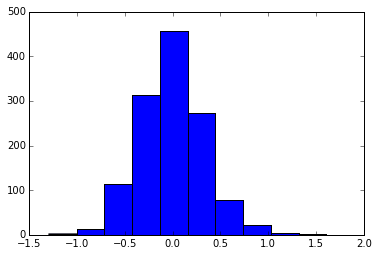

In [20]:
%pylab inline
plt.hist(X[:,3])
plt.show()

In [132]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
for n in xrange(2,20):
    for e in np.arange(0.1,1,0.1):
        pca = RandomizedPCA(n_components=n, whiten=True).fit(df) # pca is an instance of class randomizedPCA with data['data']

        X = pca.transform(df) # reduces data from (1797,64) to (1797,2) though not sure how.



        db = DBSCAN(eps=e, min_samples=10).fit(X)
        labels = db.labels_

        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        print n, ' PCs'
        print 'eps = ', e
        print('Estimated number of clusters: %d' % n_clusters_)
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 10
Silhouette Coefficient: -0.475
Estimated number of clusters: 2
Silhouette Coefficient: 0.098
Estimated number of clusters: 1
Silhouette Coefficient: 0.407
Estimated number of clusters: 1
Silhouette Coefficient: 0.473
Estimated number of clusters: 1
Silhouette Coefficient: 0.522
Estimated number of clusters: 1
Silhouette Coefficient: 0.556
Estimated number of clusters: 1
Silhouette Coefficient: 0.575
Estimated number of clusters: 1
Silhouette Coefficient: 0.586
Estimated number of clusters: 1
Silhouette Coefficient: 0.593
Estimated number of clusters: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Populating the interactive namespace from numpy and matplotlib


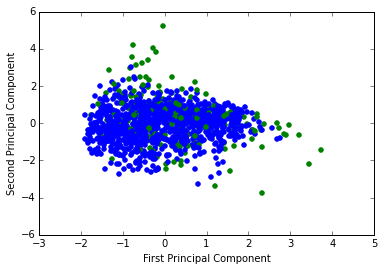

In [125]:
# 2D plot for 2 PCs
%pylab inline

colors = ["b", "r", "k", "m", "g"]

for ii, pp in enumerate(X):
    plt.scatter(X[ii][0], X[ii][1], color = colors[labels[ii]])


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

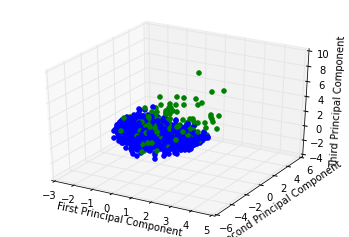

In [126]:
# 3d plot for 3 %pylab inline
from mpl_toolkits.mplot3d import Axes3D
colors = ["b", "r", "k", "m", "g"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for ii, pp in enumerate(X):
    ax.scatter(X[ii][0], X[ii][1], X[ii][2], color = colors[labels[ii]])


ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()